In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
seed=2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
df = pd.read_csv('../dataset/sonar.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
dataset = df.values
x = np.array(dataset[:,0:60], dtype=np.float64)
Y_obj = dataset[:,60]

In [5]:
e = LabelEncoder().fit(Y_obj)
y = np.array(e.transform(Y_obj), dtype=np.float64)

In [6]:
Y_obj[:5], y[:5]

(array(['R', 'R', 'R', 'R', 'R'], dtype=object), array([1., 1., 1., 1., 1.]))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2020)

In [8]:
model = Sequential([
    Dense(24, input_dim=60, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1464      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy',   # mean_squared_error
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
history=model.fit(x_train, y_train, validation_split=0.2, epochs=130, batch_size=5)

Train on 132 samples, validate on 34 samples
Epoch 1/130
132/132 [==============================] - 0s 3ms/sample - loss: 0.6835 - accuracy: 0.5076 - val_loss: 0.6790 - val_accuracy: 0.5000
Epoch 2/130
132/132 [==============================] - 0s 218us/sample - loss: 0.6657 - accuracy: 0.6818 - val_loss: 0.6602 - val_accuracy: 0.7353
Epoch 3/130
132/132 [==============================] - 0s 206us/sample - loss: 0.6512 - accuracy: 0.7424 - val_loss: 0.6468 - val_accuracy: 0.7059
Epoch 4/130
132/132 [==============================] - 0s 217us/sample - loss: 0.6398 - accuracy: 0.7273 - val_loss: 0.6338 - val_accuracy: 0.7059
Epoch 5/130
132/132 [==============================] - 0s 217us/sample - loss: 0.6216 - accuracy: 0.7197 - val_loss: 0.6253 - val_accuracy: 0.6471
Epoch 6/130
132/132 [==============================] - 0s 216us/sample - loss: 0.6044 - accuracy: 0.7348 - val_loss: 0.6022 - val_accuracy: 0.7059
Epoch 7/130
132/132 [==============================] - 0s 213us/sample - lo

132/132 [==============================] - 0s 223us/sample - loss: 0.2202 - accuracy: 0.9394 - val_loss: 0.2730 - val_accuracy: 0.9118
Epoch 57/130
132/132 [==============================] - 0s 219us/sample - loss: 0.2333 - accuracy: 0.9242 - val_loss: 0.2702 - val_accuracy: 0.8529
Epoch 58/130
132/132 [==============================] - 0s 211us/sample - loss: 0.2202 - accuracy: 0.9394 - val_loss: 0.2966 - val_accuracy: 0.8529
Epoch 59/130
132/132 [==============================] - 0s 221us/sample - loss: 0.2233 - accuracy: 0.9394 - val_loss: 0.2683 - val_accuracy: 0.8824
Epoch 60/130
132/132 [==============================] - 0s 216us/sample - loss: 0.2078 - accuracy: 0.9318 - val_loss: 0.2707 - val_accuracy: 0.8529
Epoch 61/130
132/132 [==============================] - 0s 225us/sample - loss: 0.2041 - accuracy: 0.9318 - val_loss: 0.3025 - val_accuracy: 0.8235
Epoch 62/130
132/132 [==============================] - 0s 227us/sample - loss: 0.2111 - accuracy: 0.9318 - val_loss: 0.2761 

132/132 [==============================] - 0s 229us/sample - loss: 0.0682 - accuracy: 0.9773 - val_loss: 0.2724 - val_accuracy: 0.9118
Epoch 112/130
132/132 [==============================] - 0s 225us/sample - loss: 0.0747 - accuracy: 0.9848 - val_loss: 0.2558 - val_accuracy: 0.9118
Epoch 113/130
132/132 [==============================] - 0s 225us/sample - loss: 0.0662 - accuracy: 0.9848 - val_loss: 0.2516 - val_accuracy: 0.9118
Epoch 114/130
132/132 [==============================] - 0s 224us/sample - loss: 0.0659 - accuracy: 0.9848 - val_loss: 0.2595 - val_accuracy: 0.9118
Epoch 115/130
132/132 [==============================] - 0s 224us/sample - loss: 0.0692 - accuracy: 1.0000 - val_loss: 0.2788 - val_accuracy: 0.8824
Epoch 116/130
132/132 [==============================] - 0s 218us/sample - loss: 0.0659 - accuracy: 0.9773 - val_loss: 0.2522 - val_accuracy: 0.9118
Epoch 117/130
132/132 [==============================] - 0s 214us/sample - loss: 0.0611 - accuracy: 0.9848 - val_loss: 0

In [11]:
print("\n Test Accuracy : %.4f"%(model.evaluate(x_test, y_test, verbose=2)[1]))

42/42 - 0s - loss: 0.7089 - accuracy: 0.6905

 Test Accuracy : 0.6905


In [13]:
# 모델을 컴퓨터에 저장
model.save('model/my_model.h5')

In [14]:
del model       # 테스트를 위해 메모리 내의 모델을 삭제

In [15]:
model = load_model('model/my_model.h5') # 모델을 새로 불러옴

In [16]:
print("\n Test Accuracy : %.4f"%(model.evaluate(x_test, y_test, verbose=2)[1]))

42/42 - 0s - loss: 0.7089 - accuracy: 0.6905

 Test Accuracy : 0.6905


In [17]:
df=pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.683513,0.507576,0.678985,0.500000
1,0.665704,0.681818,0.660157,0.735294
2,0.651247,0.742424,0.646810,0.705882
3,0.639819,0.727273,0.633759,0.705882
4,0.621570,0.719697,0.625250,0.647059
...,...,...,...,...
125,0.050584,0.992424,0.253368,0.911765
126,0.048574,1.000000,0.264506,0.911765
127,0.044653,0.992424,0.266589,0.911765
128,0.049018,0.992424,0.277080,0.911765


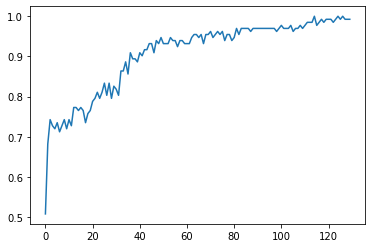

In [18]:
plt.plot(df.index,df["accuracy"])

In [19]:
dir(model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_inbound_node',
 '_add_trackable',
 '_add_unique_metric_name',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_attribute_sentinel',
 '_autocast',
 '_base_init',
 '_build_input_shape',
 '_build_model_with_inputs',
 '_cache_output_metric_attributes',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_check_call_args',
 '_check_trainable_weights_consistency',
 '_checkpoint_dependencies',
 '_clear_losse

In [20]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(60, 24) dtype=float32, numpy=
 array([[ 0.13702406,  0.03130426, -0.23760937, ...,  0.17001997,
          0.23667133,  0.22028682],
        [-0.22120656,  0.07590482,  0.1403238 , ...,  0.5098793 ,
          0.6112591 , -0.16005978],
        [-0.07986158,  0.14822215,  0.02059448, ...,  0.40845743,
          0.40263492,  0.0670231 ],
        ...,
        [ 0.24253526,  0.08839436, -0.00137398, ...,  0.4674874 ,
         -0.39014906,  0.12286276],
        [-0.08386319, -0.09470081, -0.24062143, ..., -0.1816144 ,
         -0.21334536,  0.1637702 ],
        [-0.04979208,  0.02087546,  0.19779755, ..., -0.06355997,
          0.2552555 , -0.12811004]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(24,) dtype=float32, numpy=
 array([-0.02086805,  0.03300632, -0.09820804,  0.        ,  0.07079567,
        -0.00883755, -0.12202308, -0.07532368,  0.13673474, -0.05017675,
        -0.00719442, -0.0585526 ,  0.        , -0.04706045, -0.00937931,
   

In [25]:
len(model.weights)

6

In [32]:
for i in range(6):
    print(i, model.weights[i].shape)

0 (60, 24)
1 (24,)
2 (24, 10)
3 (10,)
4 (10, 1)
5 (1,)


In [37]:
print([model.weights[i].shape for i in range(6)])

[TensorShape([60, 24]), TensorShape([24]), TensorShape([24, 10]), TensorShape([10]), TensorShape([10, 1]), TensorShape([1])]
